## **Homework 2 - Problem 5: Simple MoE Approach**

### **Step 1: Background Reading & ASD Code**

In [169]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [170]:
np.set_printoptions(suppress=True) #will show decimal value as is rather than in scientific notation

### Loading Data

In [171]:
#Load train ASD data file and visualize
train_data = pd.read_csv("C:/Users/devdw/Downloads/Behavioral Data Science/Autism_Prediction/train.csv", delimiter=",")
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [172]:
#Load test ASD data file and visualize
test_data = pd.read_csv("C:/Users/devdw/Downloads/Behavioral Data Science/Autism_Prediction/test.csv", delimiter=",")
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [173]:
#Define all column factors determining if ASD or not
columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
           'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

In [174]:
#Define x & y training data values
x_train = train_data[columns].values.astype(np.float32)
y_train = train_data["Class/ASD"].values.astype(np.float32)

In [175]:
y_train.shape

(800,)

### Logistic Regression Model

In [176]:
#Defining Logistic Regression Model
logistic_model = LogisticRegression().fit(x_train, y_train)

#Defining Logistic Model Predictions
logistic_probs_train = logistic_model.predict_proba(x_train)[:, 1]

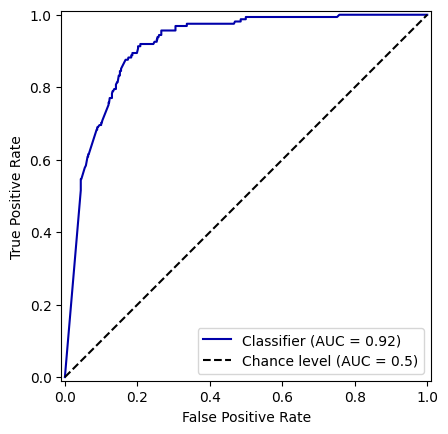

In [177]:
#Visualizing Logistic Regression Model Predictions Against Y Train Values
display = RocCurveDisplay.from_predictions(
    y_train,
    logistic_probs_train,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

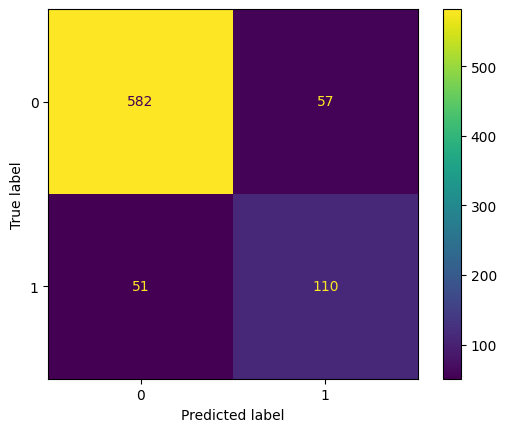

In [178]:
#Binary Definition of Logistic Training Model
logistic_preds_train = (logistic_probs_train > 0.5).astype(y_train.dtype)

#Confusion Matrix Visualization
display = ConfusionMatrixDisplay(
    confusion_matrix(y_train, logistic_preds_train)
)
display.plot()

### Rule-Based Decision Model

In [179]:
#Defining Rule Based Model
rule_based_preds_train = (train_data[columns].sum(axis=1) >= 6).values.astype(np.float32)


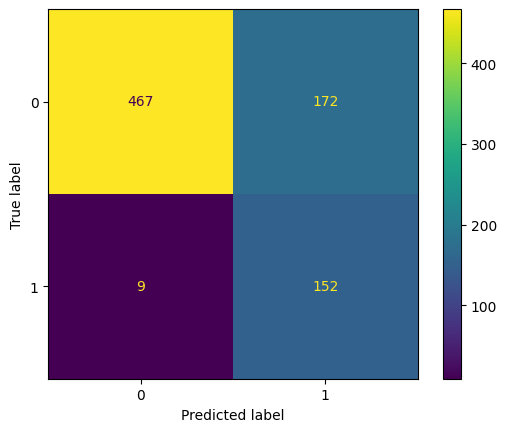

In [180]:
#Confusion Matrix Visualization
display = ConfusionMatrixDisplay(
    confusion_matrix(y_train, rule_based_preds_train)
)
display.plot()

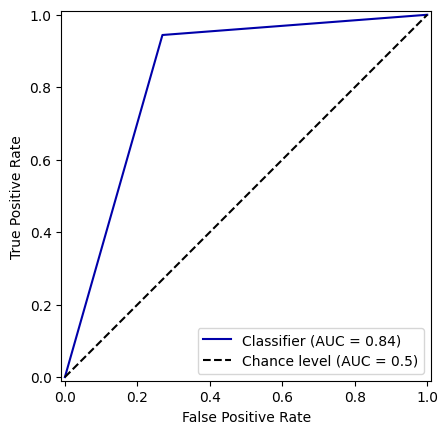

In [181]:
#Visualizing Rule-Based Model Predictions Against Y Train Values
display = RocCurveDisplay.from_predictions(
    y_train,
    rule_based_preds_train,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

### Neural Network Model

In [182]:
#Defining Neural Network Model
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(128, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Specifying Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

#Compiling Model
nn_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

#Training Model
nn_model_history = nn_model.fit(x=x_train, y=y_train, batch_size=64, epochs=500)



Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7271 - loss: 0.6474
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7891 - loss: 0.4863 
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8376 - loss: 0.4241 
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8293 - loss: 0.3711 
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8637 - loss: 0.3232 
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8474 - loss: 0.3369 
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8647 - loss: 0.3162 
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8501 - loss: 0.3135 
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8573 - loss: 0.3009 
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8499 - loss: 0.3177 
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8665 - loss: 0.2924 
Epoch 12/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

In [183]:
#Defining Predictions and Binary Results of Model
nn_model_probs_train = nn_model.predict(x_train)
nn_model_preds_train = (nn_model_probs_train > 0.5).astype(y_train.dtype)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


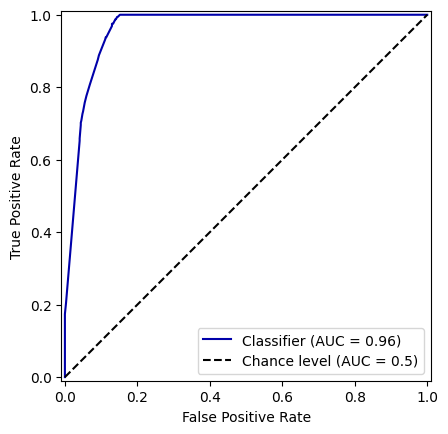

In [184]:
#Visualizing Neural Network Model Predictions Against Y Train Values
display = RocCurveDisplay.from_predictions(
    y_train,
    nn_model_probs_train,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

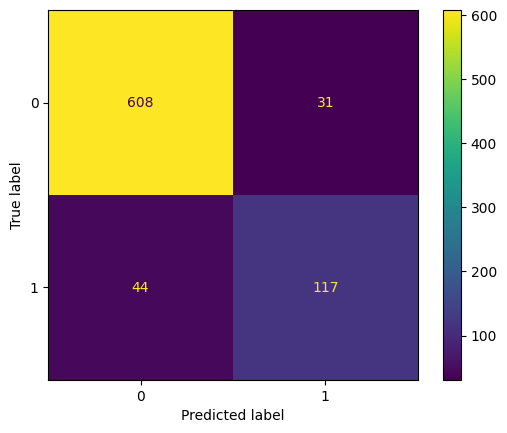

In [185]:
display = ConfusionMatrixDisplay(
    confusion_matrix(y_train, nn_model_preds_train)
)
display.plot()

### **Step 2: Constructing Meta-Features**

### Training Data Feature Set

In [186]:
#Defining Training Feature Set
train_feature_set = {
    'Column 1' : logistic_preds_train,
    'Column 2' : rule_based_preds_train,
    'Column 3' : nn_model_preds_train[:, 0],
    'Column 4' : y_train
}

#Create Dataframe Using Feature Set Dictionary
training_df = pd.DataFrame(train_feature_set)

#Save Dataframe as Excel File
training_df.to_excel("Homework 2 Training Data Feature Set.xlsx", index=False)

### Testing Data Feature Set

In [187]:
print(test_data.columns)

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')


In [188]:
#Define x & y training data values
x_test = test_data[columns].values.astype(np.float32)
y_test = test_data["austim"].values

y_test = (y_test == "yes").astype(np.float32)

In [189]:
#Logistic Model
logistic_probs_test = logistic_model.predict_proba(x_test)[:, 1]
logistic_preds_test = (logistic_probs_test > 0.5).astype(y_test.dtype)

In [190]:
#Rule-Based Model
rule_based_preds_test = (test_data[columns].sum(axis=1) >= 6).values.astype(np.float32)

In [191]:
#Neural Network Model
nn_model_history_test = nn_model.fit(x=x_test, y=y_test, batch_size=64, epochs=500)
nn_model_probs_test = nn_model.predict(x_test)
nn_model_preds_test = (nn_model_probs_test > 0.5).astype(y_test.dtype)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7846 - loss: 0.5695
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8060 - loss: 0.5606
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8417 - loss: 0.3859
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8551 - loss: 0.4194
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8269 - loss: 0.3786
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8649 - loss: 0.3285
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.3697
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8404 - loss: 0.3781
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8723 - loss: 0.3054
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8749 - loss: 0.3247
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8968 - loss: 0.2764
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8822 - lo

In [192]:
#Defining Testing Feature Set
test_feature_set = {
    'Column 1' : logistic_preds_test,
    'Column 2' : rule_based_preds_test,
    'Column 3' : nn_model_preds_test[:, 0],
    'Column 4' : y_test
}

#Create Dataframe Using Feature Set Dictionary
testing_df = pd.DataFrame(test_feature_set)

#Save Dataframe as Excel File
testing_df.to_excel("Homework 2 Testing Data Feature Set.xlsx", index=False)

### **Step 3: Training the Random Forest Classifier**

In [226]:
#For Training Data

#Prepare a new feature matrix by combining probabilities rather than predictions 
train_meta = np.column_stack((logistic_probs_train, rule_based_preds_train, nn_model_probs_train))

#Create RandomForestClassifier Using Stacked Data
rf_model = RandomForestClassifier(n_estimators=200, random_state=42).fit(train_meta, y_train)

In [227]:
#For Testing Data
test_meta = np.column_stack((logistic_probs_test, rule_based_preds_test, nn_model_probs_test))

#Applying RandomForestClassifier Training Model to Testing Data
rf_probs = rf_model.predict_proba(test_meta)[:, 1]
rf_preds = (rf_probs > 0.5).astype(y_train.dtype)

#RandomForestClassifier Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9150


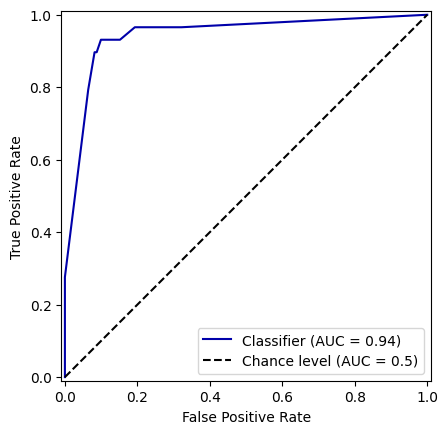

In [228]:
#Visualization of RandomForestClassifier Accuracy
display = RocCurveDisplay.from_predictions(
    y_test,
    rf_probs,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

In [230]:
#For Extended Training Data (COMPARISON)

#Prepare a new feature matrix by combining probabilities rather than predictions 
train_meta_extended = np.column_stack((x_train, logistic_probs_train, rule_based_preds_train, nn_model_probs_train))

#Create RandomForestClassifier Using Stacked Data
rf_model_extended = RandomForestClassifier(n_estimators=200, random_state=42).fit(train_meta_extended, y_train)

In [231]:
#For Testing Data Extended
test_meta_extended = np.column_stack((x_test, logistic_probs_test, rule_based_preds_test, nn_model_probs_test))

#Applying RandomForestClassifier Training Model to Testing Data
rf_probs_extended = rf_model_extended.predict_proba(test_meta_extended)[:, 1]
rf_preds_extended = (rf_probs_extended > 0.5).astype(y_train.dtype)

#RandomForestClassifier Accuracy
rf_accuracy_extended = accuracy_score(y_test, rf_preds_extended)
print(f"Random Forest Accuracy: {rf_accuracy_extended:.4f}")

Random Forest Accuracy: 0.9150


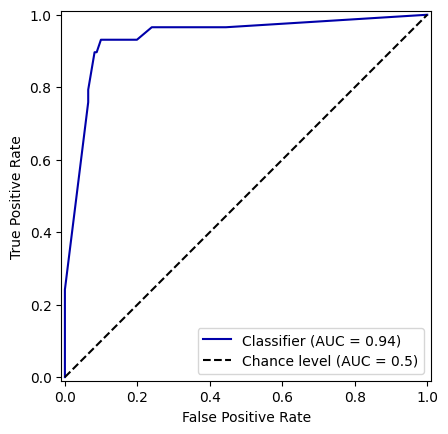

In [232]:
#Visualization of RandomForestClassifier Accuracy
display = RocCurveDisplay.from_predictions(
    y_test,
    rf_probs_extended,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

Logistic Regression Accuracy: 0.8250


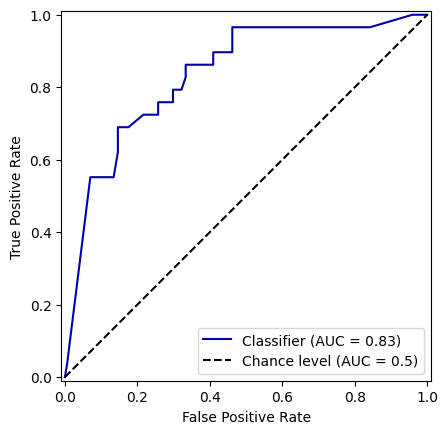

In [204]:
#Visualization of Logistic Regression Accuracy
display = RocCurveDisplay.from_predictions(
    y_test,
    logistic_probs_test,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

lr_accuracy = accuracy_score(y_test, logistic_preds_test)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Neural Network Accuracy: 0.9150


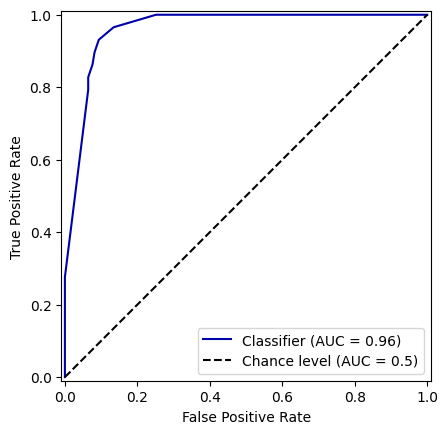

In [205]:
#Visualization of Neural Network Accuracy
display = RocCurveDisplay.from_predictions(
    y_test,
    nn_model_probs_test,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

nn_accuracy = accuracy_score(y_test, nn_model_preds_test)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

### **Step 4: Comparing Performance**

Random Forest Baseline Accuracy: 0.8050
Random Forest MoE Accuracy: 0.9150


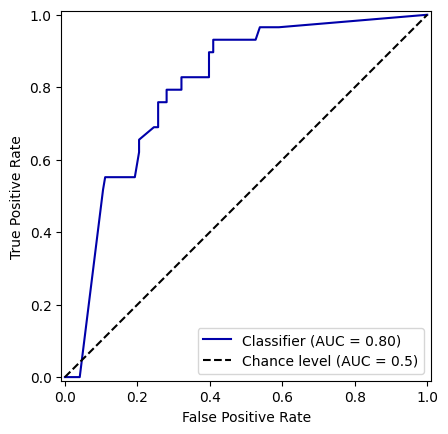

In [209]:
#Train RandomForestClassifier on Original Dataset
rf_baseline = RandomForestClassifier(n_estimators=1000, random_state=42).fit(x_train, y_train)

#Predict on Test Data
rf_baseline_probs = rf_baseline.predict_proba(x_test)[:, 1]
rf_baseline_preds = (rf_baseline_probs > 0.5).astype(y_train.dtype)

#Visualization of Neural Network Accuracy
display = RocCurveDisplay.from_predictions(
    y_test,
    rf_baseline_probs,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

#Accuracy
rfb_accuracy = accuracy_score(y_test, rf_baseline_preds)
print(f"Random Forest Baseline Accuracy: {rfb_accuracy:.4f}")

#MoE Accuracy from Step 3
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest MoE Accuracy: {rf_accuracy:.4f}")